In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
articles = pd.read_csv("../../build/articles2.csv", index_col=0)
universities_df = pd.read_csv('../../build/universities.csv', index_col=0)
professors_df = pd.read_csv('../../build/professors.csv')
articles.drop(columns=["GS_link", "more_info", ], inplace=True)
articles.dropna(inplace=True)

In [25]:
# Parsa's custom file paths
articles = pd.read_csv("../articlesV4.csv", index_col=0)
universities_df = pd.read_csv('../universitiesV4.csv', index_col=0)
professors_df = pd.read_csv('../professorsV2.csv')
articles.drop(columns=["GS_link", "more_info", ], inplace=True)
articles.dropna(inplace=True)

In [26]:
import ast
articles.llama_subjects = articles.llama_subjects.apply(ast.literal_eval)

In [27]:
candidate_labels = [
    "Agricultural and Biological Sciences", "Arts and Humanities", "Biochemistry, Genetics and Molecular Biology",
    "Business, Management and Accounting", "Chemical Engineering", "Chemistry", "Computer Science",
    "Decision Sciences", "Dentistry", "Earth and Planetary Sciences", "Economics, Econometrics and Finance",
    "Energy", "Environmental Science", "Immunology and Microbiology",
    "Materials Science", "Mathematics", "Medicine", "Neuroscience", "Nursing",
    "Pharmacology, Toxicology and Pharmaceutics", "Physics and Astronomy", "Psychology", "Social Sciences",
    "Veterinary", "Biological and Agricultural Sciences"
]


def assign_closest(x):
    x_copy = x.copy()
    for i in x:
        if i not in candidate_labels:
            x_copy.remove(i)
    if x_copy:
        if x_copy[0] == "Biological and Agricultural Sciences":
            return "Agricultural and Biological Sciences"
        return x_copy[0]

articles["main_subject"] = articles.llama_subjects.apply(assign_closest)
articles.drop(columns=["llama_subjects"], inplace=True)

In [28]:
articles.dropna(inplace=True)

In [23]:
articles.to_csv("../articles_with_main_subject.csv")

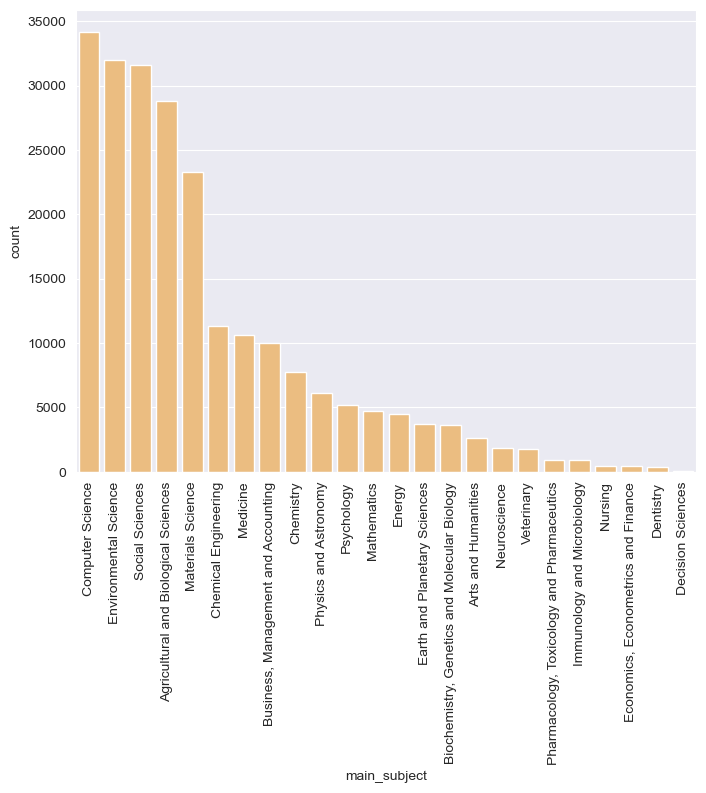

In [29]:
sorted_order = articles['main_subject'].value_counts().index


plt.figure(figsize=(8, 6))
sns.countplot(articles, x="main_subject", order=sorted_order,  color=sns.color_palette("Paired")[6])
plt.xticks(rotation=90);

C:\Users\Parsa\AppData\Local\Temp\ipykernel_66484\3829510184.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='coolwarm')


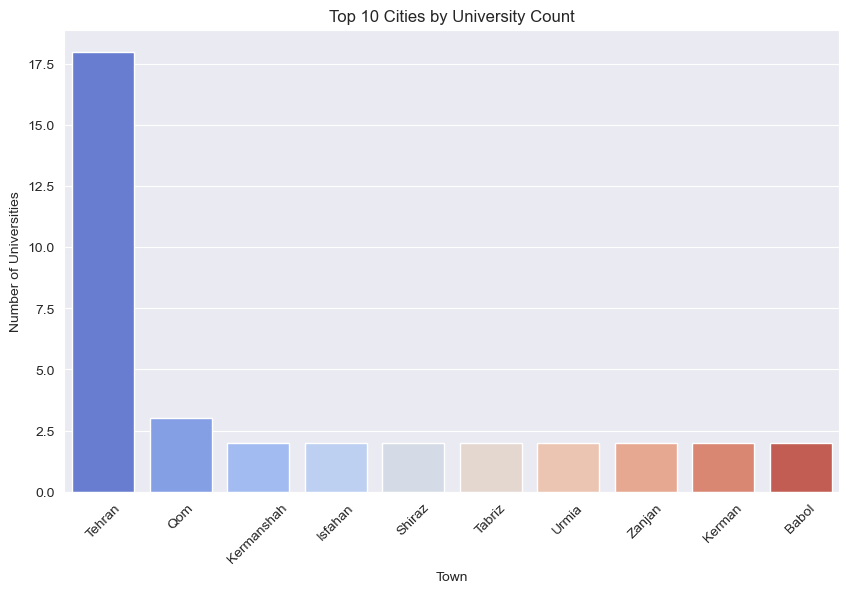

In [30]:
# Count universities by city
city_counts = universities_df['Town'].value_counts().head(10)  # Top 10 cities

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='coolwarm')
plt.title('Top 10 Cities by University Count')
plt.ylabel('Number of Universities')
plt.xticks(rotation=45)
plt.show()


In [38]:
universities_df['Town'].value_counts()

Town
Tehran          18
Qom              3
Kermanshah       2
Isfahan          2
Shiraz           2
Tabriz           2
Urmia            2
Zanjan           2
Kerman           2
Babol            2
Ardabil          1
Ilam             1
Gorgan           1
Sabzevar         1
Khorramabad      1
Damghan          1
Rafsanjan        1
Babolsar         1
Maragheh         1
Bandar-Abbas     1
Zabol            1
Malayer          1
Shahrood         1
Bushehr          1
Sahand Town      1
Arak             1
Mashhad          1
Sanandaj         1
Birjand          1
Qazvin           1
Zahedan          1
Hamedan          1
Kashan           1
Yazd             1
Shahrekord       1
Semnan           1
Rasht            1
Ahvaz            1
Ardakan          1
Name: count, dtype: int64

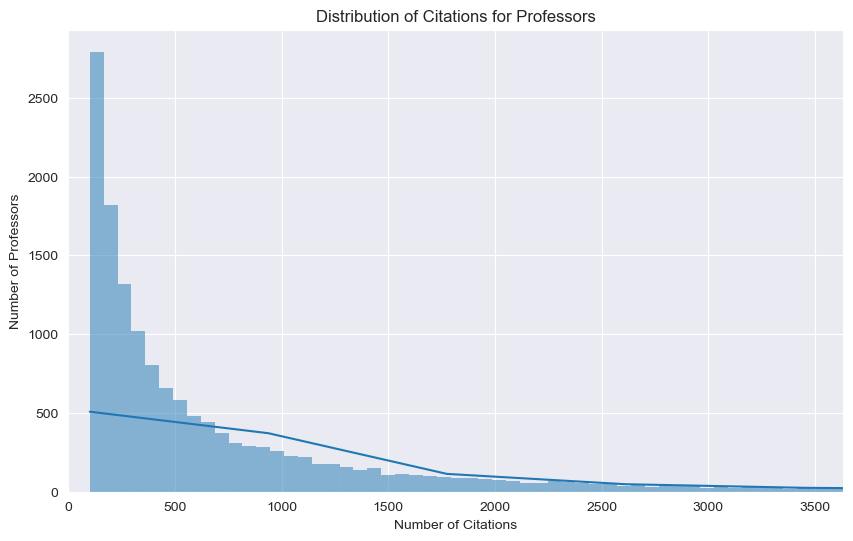

In [31]:
# Plot citation distribution
plt.figure(figsize=(10, 6))
sns.histplot(professors_df['cited_by'], kde=True)
plt.title('Distribution of Citations for Professors')
plt.xlabel('Number of Citations')
plt.ylabel('Number of Professors')
plt.xlim(0, professors_df['cited_by'].quantile(0.95))  # Limit x-axis to the 95th percentile
plt.show()


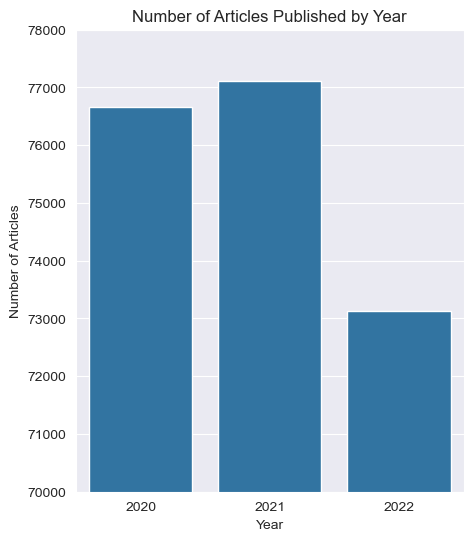

In [32]:
# Group articles by year
articles_per_year = articles.groupby('year')['title'].count()

# Plot
plt.figure(figsize=(5, 6))
sns.barplot(x=articles_per_year.index, y=articles_per_year.values)
plt.title('Number of Articles Published by Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.ylim(70_000,78_000)
plt.show()


Text(0, 0.5, 'Number of Subjects')

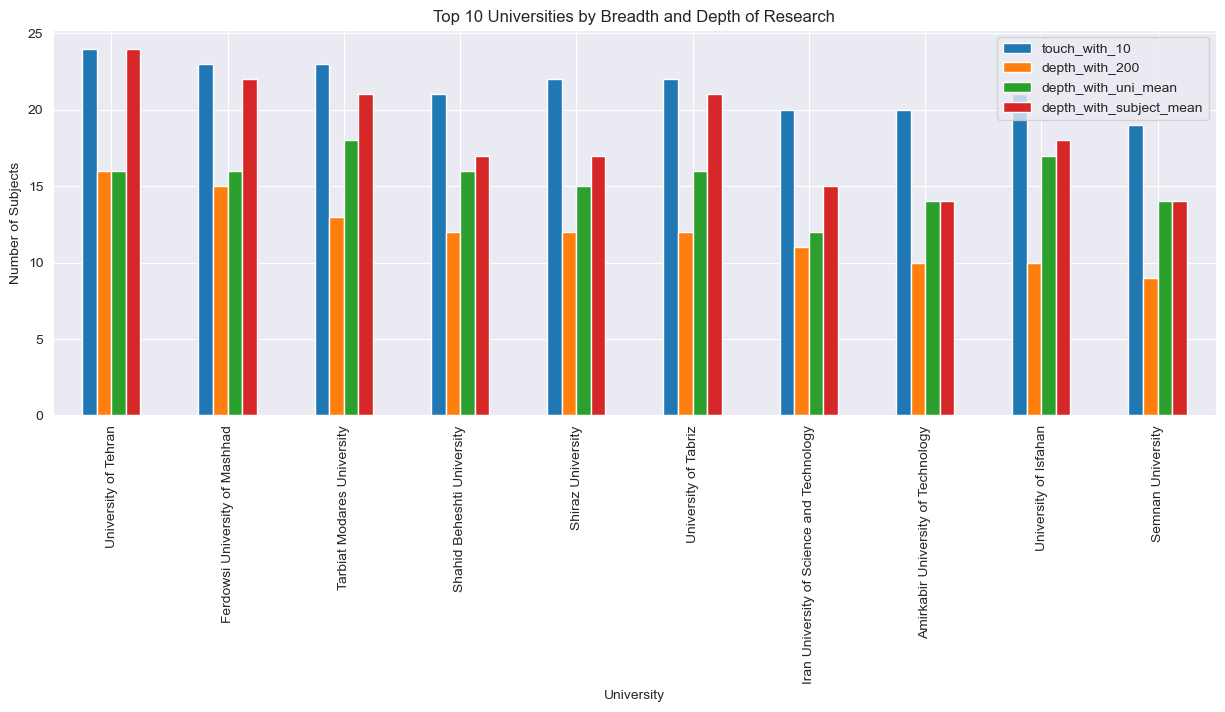

In [33]:
# Extract depth and breadth metrics
breadth_df = universities_df[['University', 'touch_with_10', 'depth_with_200', "depth_with_uni_mean", "depth_with_subject_mean"]].sort_values(by='depth_with_200', ascending=False).head(10)

# Plot breadth and depth
fig, ax = plt.subplots(figsize=(15,5))
breadth_df.set_index('University').plot(kind='bar', stacked=False, ax=ax, rot=90)
ax.set_title('Top 10 Universities by Breadth and Depth of Research')
ax.set_ylabel('Number of Subjects')

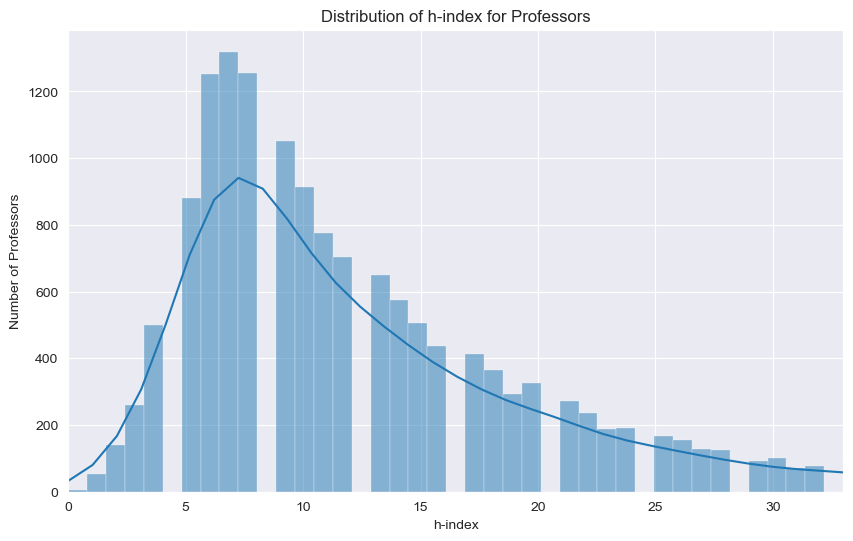

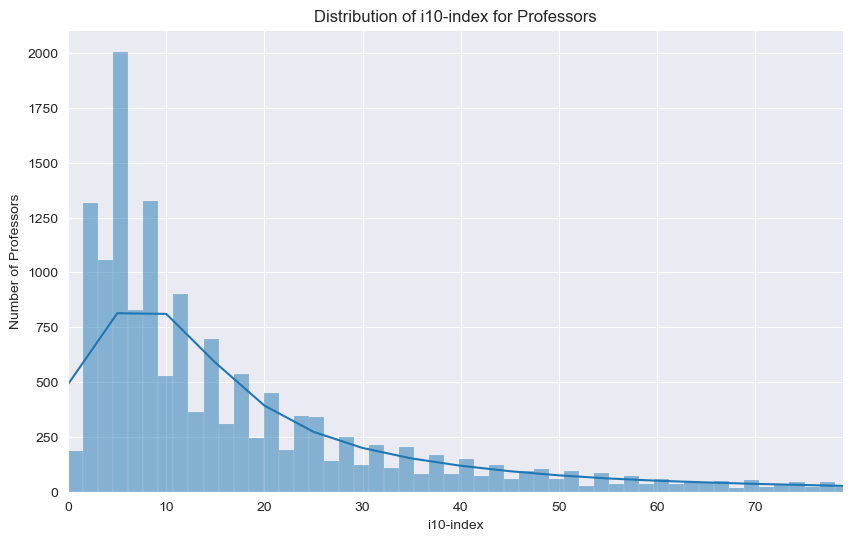

In [34]:
# Plot h-index distribution
plt.figure(figsize=(10, 6))
sns.histplot(professors_df['h_index'], kde=True)
plt.title('Distribution of h-index for Professors')
plt.xlabel('h-index')
plt.ylabel('Number of Professors')
plt.xlim(0, professors_df['h_index'].quantile(0.95))  # Limit x-axis to the 95th percentile
plt.show()

# Plot i10-index distribution
plt.figure(figsize=(10, 6))
sns.histplot(professors_df['i10_index'],  kde=True)
plt.xlim(0, professors_df['i10_index'].quantile(0.95))  # Limit x-axis to the 95th percentile
plt.title('Distribution of i10-index for Professors')
plt.xlabel('i10-index')
plt.ylabel('Number of Professors')
plt.show()


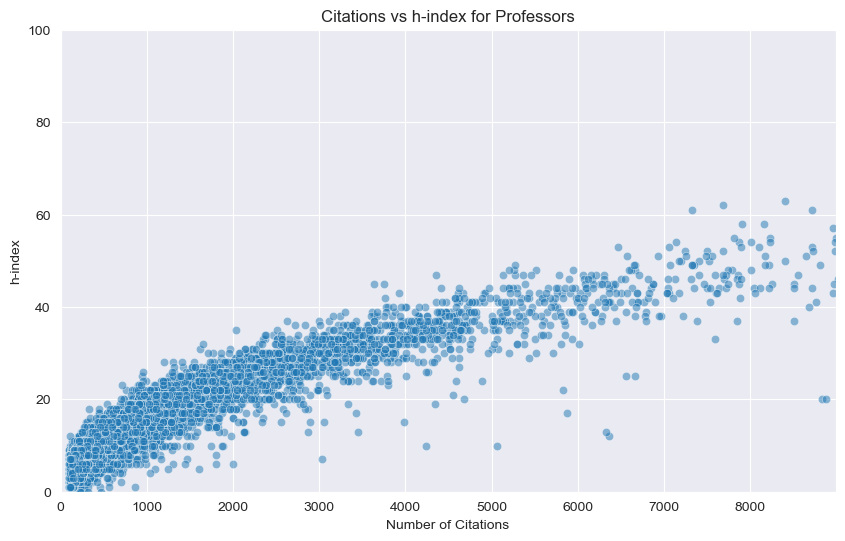

In [35]:
# Scatter plot for citations vs h-index
plt.figure(figsize=(10, 6))
sns.scatterplot(x=professors_df['cited_by'], y=professors_df['h_index'], alpha=0.5)
plt.title('Citations vs h-index for Professors')
plt.xlabel('Number of Citations')
plt.ylabel('h-index')
plt.xlim(0, professors_df['cited_by'].quantile(0.99))  # Limiting x-axis for clarity
plt.ylim(0, 100)
plt.show()
